# MNIST Digits Classification Dataset

In [ ]:
from keras.datasets import mnist

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [ ]:
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

X_train.shape (60000, 28, 28)
X_test.shape (10000, 28, 28)
y_train.shape (60000,)
y_test.shape (10000,)


In [ ]:
# Keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical # To perform one-hot encoding (Build dummy columns with the easiest way)

# Flattening the images from the 28 * 28 pixels to 1 Dimensional 784 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [ ]:
# Normalizing the data to help with the training

X_train /= 255
X_test /= 255

In [ ]:
# One hot encoding

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print("Shape before one-hot encoding: ", y_train.shape)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
# Option 1: Use initializers and regularizers

from keras import initializers
from keras import regularizers

# Option 2: Use Dropout with early stopping
from keras.layers import Dropout

# Option 3: Use EarlyStopping
from keras.callbacks import EarlyStopping

In [ ]:
# Form NN
# Building a linear stack of layers with the sequential model

L1=100
L2=100
L3=100

model = Sequential()
# model.add(Dense(L1, input_dim=784,activation='relu')) # Original
# model.add(Dense(L1, input_dim=784,activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.01))) # Option 1
model.add(Dense(L2, activation='relu'))
model.add(Dense(L3, activation='relu'))
# model.add(Dropout(rate=0.2)) # Option 2


# Output layer (Softmax = multi nominal)
model.add(Dense(10, activation='softmax'))


In [ ]:
# Compile the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
 # Training the model for 10 epochs

early_monitoring_monitor = EarlyStopping(patience=3) # Option 3

# history = model.fit(X_train,Y_train,epochs=10,batch_size=100,validation_data=(X_test,Y_test))
history = model.fit(X_train,Y_train,epochs=30,batch_size=100,validation_data=(X_test,Y_test),callbacks=[early_monitoring_monitor]) # Option 3 with increased epochs

Epoch 1/30
600/600 [==============================] - 4s 5ms/step - loss: 0.3124 - accuracy: 0.9110 - val_loss: 0.1553 - val_accuracy: 0.9552
Epoch 2/30
600/600 [==============================] - 3s 5ms/step - loss: 0.1288 - accuracy: 0.9622 - val_loss: 0.1068 - val_accuracy: 0.9679
Epoch 3/30
600/600 [==============================] - 3s 5ms/step - loss: 0.0890 - accuracy: 0.9727 - val_loss: 0.0911 - val_accuracy: 0.9711
Epoch 4/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0666 - accuracy: 0.9798 - val_loss: 0.0889 - val_accuracy: 0.9725
Epoch 5/30
600/600 [==============================] - 3s 5ms/step - loss: 0.0564 - accuracy: 0.9821 - val_loss: 0.0781 - val_accuracy: 0.9755
Epoch 6/30
600/600 [==============================] - 3s 5ms/step - loss: 0.0434 - accuracy: 0.9862 - val_loss: 0.0751 - val_accuracy: 0.9777
Epoch 7/30
600/600 [==============================] - 3s 5ms/step - loss: 0.0366 - accuracy: 0.9886 - val_loss: 0.0808 - val_accuracy: 0.9775
Epoch 

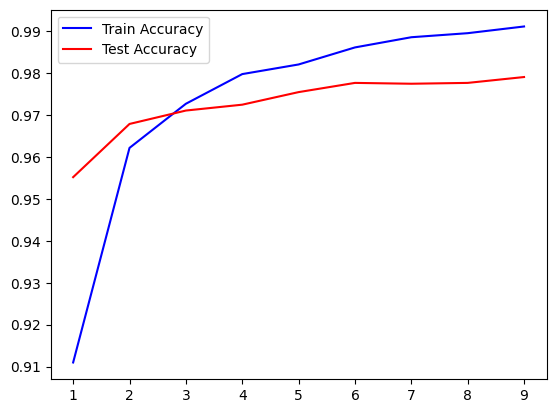

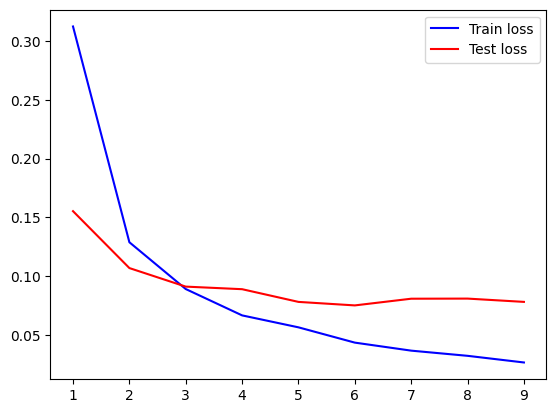

In [ ]:
# Visualisations

import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

# 'b' and 'r' are blue and red color

plt.plot(epochs, acc2, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train loss')
plt.plot(epochs, val_loss, 'r', label = 'Test loss')
plt.legend()
plt.show()